In [276]:
import pandas as pd

In [298]:
import json

with open('../malaria_data/training.json') as f:
    json_file = json.load(f)

In [299]:
# create empty dictionary with column names as keys
cells_df = {
    'path':[],
    'min_r':[],
    'min_c':[],
    'max_r':[],
    'max_c':[],
    'r_len':[],
    'c_len':[],
    'category':[]
}

# run a first for loop to get each image from list
for category in json_file:
    
    #Populate cells_df dict with path
    # cells_df['path'].append(image['image']['pathname'])
    
    # run a nested loop withing each image to get the individual object data

    # #Populate cells_df dict with bounding box data
    for entry in category['objects']:
        cells_df['path'].append(category['image']['pathname'])
        cells_df['min_r'].append(entry['bounding_box']['minimum']['r'])
        cells_df['min_c'].append(entry['bounding_box']['minimum']['c'])
        cells_df['max_r'].append(entry['bounding_box']['maximum']['r'])
        cells_df['max_c'].append(entry['bounding_box']['maximum']['c'])
        cells_df['r_len'].append(entry['bounding_box']['maximum']['r']-entry['bounding_box']['minimum']['r'])
        cells_df['c_len'].append(entry['bounding_box']['maximum']['c']-entry['bounding_box']['minimum']['c'])
        cells_df['category'].append(entry['category'])

# create dataframe using pandas  

cells_df = pd.DataFrame(cells_df)

In [300]:
cells_df

,path,min_r,min_c,max_r,max_c,r_len,c_len,category
0,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,1057,1440,1158,1540,101,100,red blood cell
1,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,868,1303,971,1403,103,100,red blood cell
2,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,578,900,689,1008,111,108,red blood cell
3,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,304,611,408,713,104,102,red blood cell
4,/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png,198,881,312,1003,114,122,red blood cell
...,...,...,...,...,...,...,...,...
80108,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,757,520,873,595,116,75,red blood cell
80109,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,308,808,406,900,98,92,trophozoite
80110,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,510,453,595,570,85,117,red blood cell
80111,/images/99e979d4-ee97-4d7f-9da6-00bead40db4d.png,0,1260,87,1344,87,84,red blood cell


In [301]:
cells_df.groupby("path").count()

,min_r,min_c,max_r,max_c,r_len,c_len,category
path,,,,,,,
/images/002f20ad-2ace-499c-9335-c9080bc3e6b5.png,54,54,54,54,54,54,54
/images/003a89b0-a095-417a-8dd6-f408339bbc68.png,68,68,68,68,68,68,68
/images/003d1cdc-0aec-430b-90e0-f4d82135b1ac.png,21,21,21,21,21,21,21
/images/005e60b6-77b8-458c-b57c-bfe0c7e7df78.png,52,52,52,52,52,52,52
/images/00a02700-2ea2-4590-9e15-ffc9160fd3de.png,44,44,44,44,44,44,44
...,...,...,...,...,...,...,...
/images/ff1b23d0-3cef-459b-b81f-39bfcdb6526f.png,64,64,64,64,64,64,64
/images/ff37dd9b-2e3c-444d-9d29-6db186cfa2fb.png,68,68,68,68,68,68,68
/images/ff3b9d4d-373c-48ef-a75a-d23e2c2ade87.png,94,94,94,94,94,94,94


In [302]:
cells_df = cells_df[cells_df['category'].str.contains('red')]

In [303]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw 
import os
import numpy as np
# print (os.path.join('..','malaria_data',cells_df.iloc[0][0]))
filename = os.path.join('..','malaria_data',cells_df.iloc[109][0][1:])
img = Image.open(filename)
img.load()
data = np.asarray( img, dtype="int32" )
img = Image.fromarray(data, 'RGB')    
img.show()

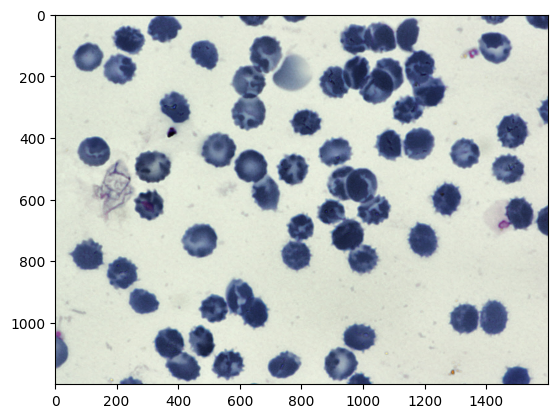

In [304]:
plt.imshow(data)

In [305]:
import cv2
import glob as gl #this allows you to look at UNIX file structures
from PIL import Image, ImageEnhance, ImageStat

In [375]:
# filenames = gl.glob("../malaria_data/images/*.png")


#pseudo code 
'''
take each line of dataframe, which is rbc
put image in img 
take a slice of this into new np.array: min_r, min_c, r_len, c_len
crop_img = img[y:y+h, x:x+w]
'''
# images_lst =[[
#                 "cropped image orig",
#                 "cropped resize orig",
#                 "cropped image",
#                 "cropped resize",
#                 "delta contr",
#                 "mean contr",
#                 "median contr"
#             ]]
images_lst=[]

for index, row in cells_df.head(100).iterrows():
    if index == 0 or row.path != cells_df.iloc[index-1].path:
        filename = os.path.join('..','malaria_data',row.path[1:])
        image = Image.open(filename).convert('L')
        stats = ImageStat.Stat(image)
        
    y, x, Y, X = row.min_r, row.min_c, \
            row.max_r, row.max_c

    crop_img_orig = image.crop((x,y,X,Y))
    crop_img_resized_orig = crop_img_orig.resize((108,108))

    # max_min_cont, mean_cont, med_cont = stats.extrema[0], stats.mean[0], stats.median[0]
    # delta_max_min_cont = max_min_cont[1]-max_min_cont[0]
    # if delta_max_min_cont <150:
    #     image = ImageEnhance.Contrast(image).enhance(1000/delta_max_min_cont)
    # elif delta_max_min_cont <100:
    #     image = ImageEnhance.Contrast(image).enhance(4000/delta_max_min_cont)
    # elif mean_cont < 230: 
    #     image = ImageEnhance.Brightness(image).enhance(1.3)
    # elif med_cont < 170:
    #     image = ImageEnhance.Brightness(image).enhance(1.8)

#     crop_img = image.crop((x,y,X,Y))
#     crop_img_resized = crop_img.resize((108,108))
    
    images_lst.append({
                    "cropped image orig": crop_img_orig,
                    "cropped resize orig": crop_img_resized_orig,
                    "cropped image": crop_img,
                    "cropped resize": crop_img_resized,
                    "delta contr": delta_max_min_cont,
                    "mean contr": mean_cont,
                    "median contr": med_cont
                    })
    
    # images_lst.append([
    #                     np.array(crop_img_orig),
    #                     np.array(crop_img_resized_orig),
    #                     np.array(crop_img),
    #                     np.array(crop_img_resized),
    #                     delta_max_min_cont,
    #                     mean_cont,
    #                     med_cont
    #                     ])
                                          
    # print(crop_img)
len(images_lst)
# res = [[key for key in images_lst[0].keys()], *[list(idx.values()) for idx in images_lst]]

100

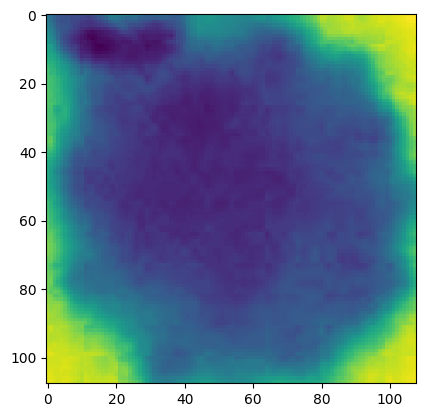

In [372]:
plt.imshow(images_lst[9]["cropped resize orig"])

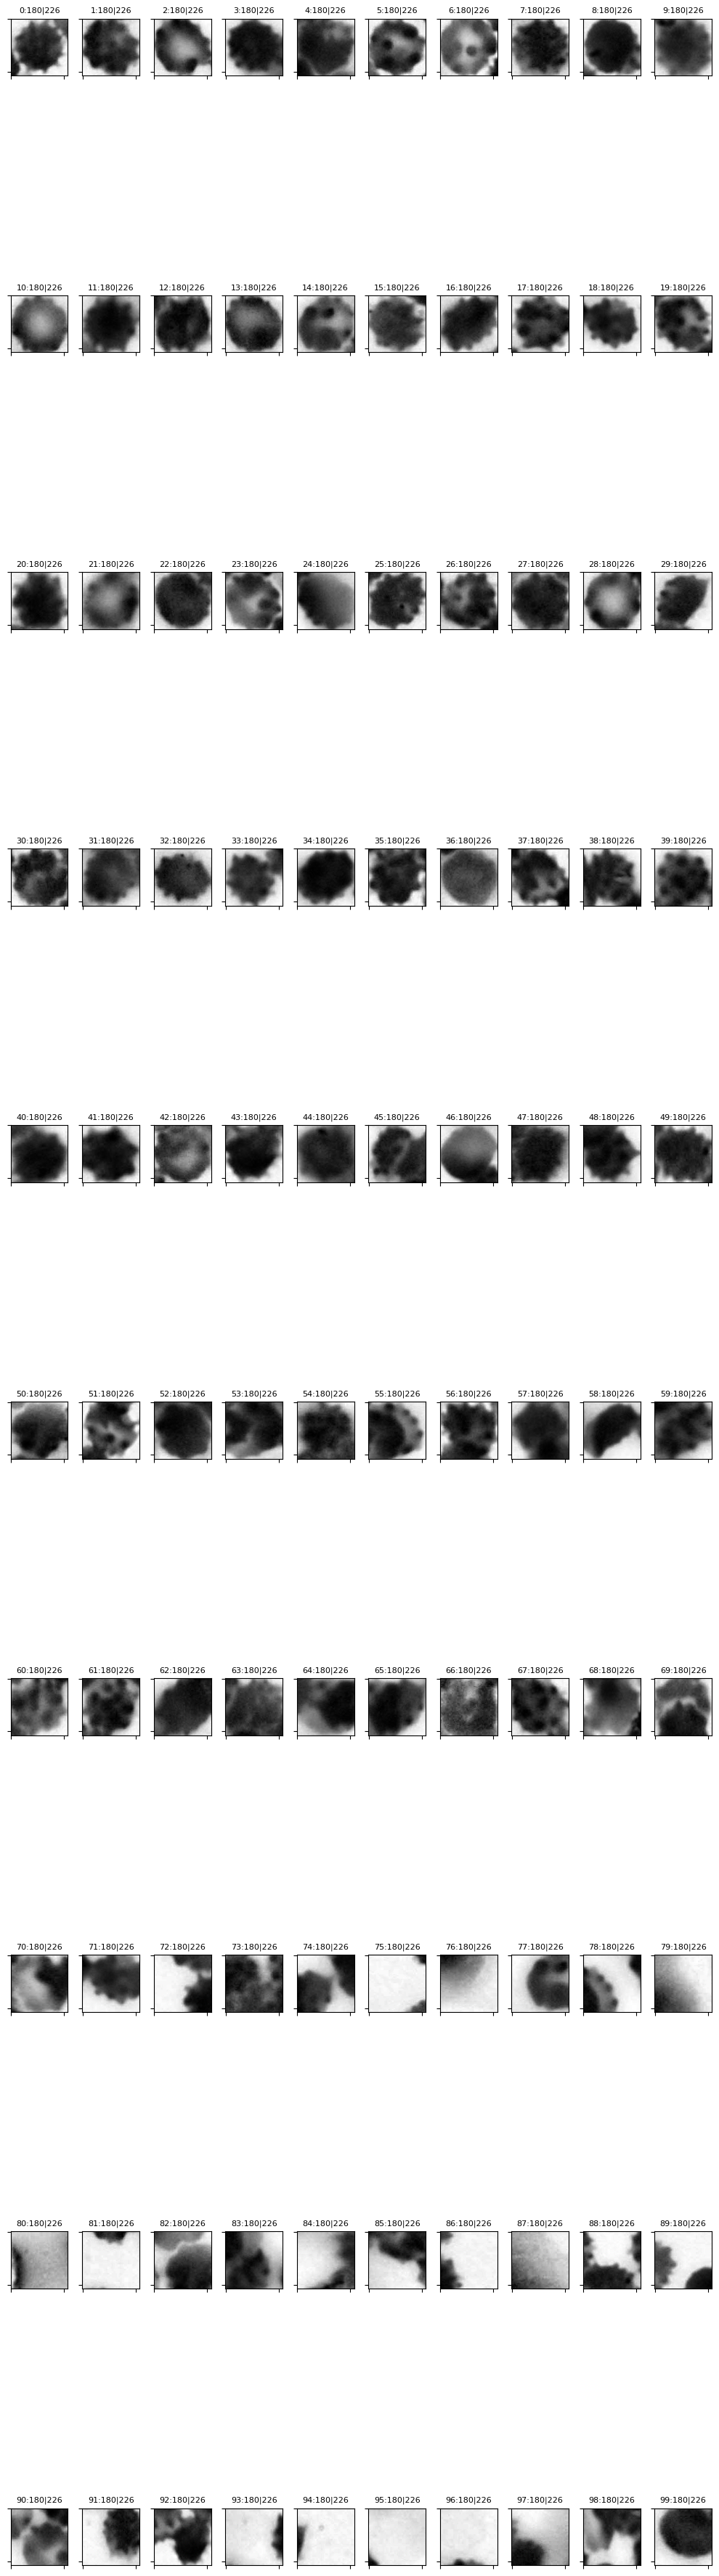

In [376]:
fig, axs = plt.subplots(10,10, figsize = (10,40))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(images_lst[i]["cropped resize orig"], cmap="gray")
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.title.set_text(f'{i}:{images_lst[i]["mean contr"]:.0f}|{images_lst[i]["median contr"]:.0f}')
    ax.title.set_fontsize(8)
fig.tight_layout()
plt.show();

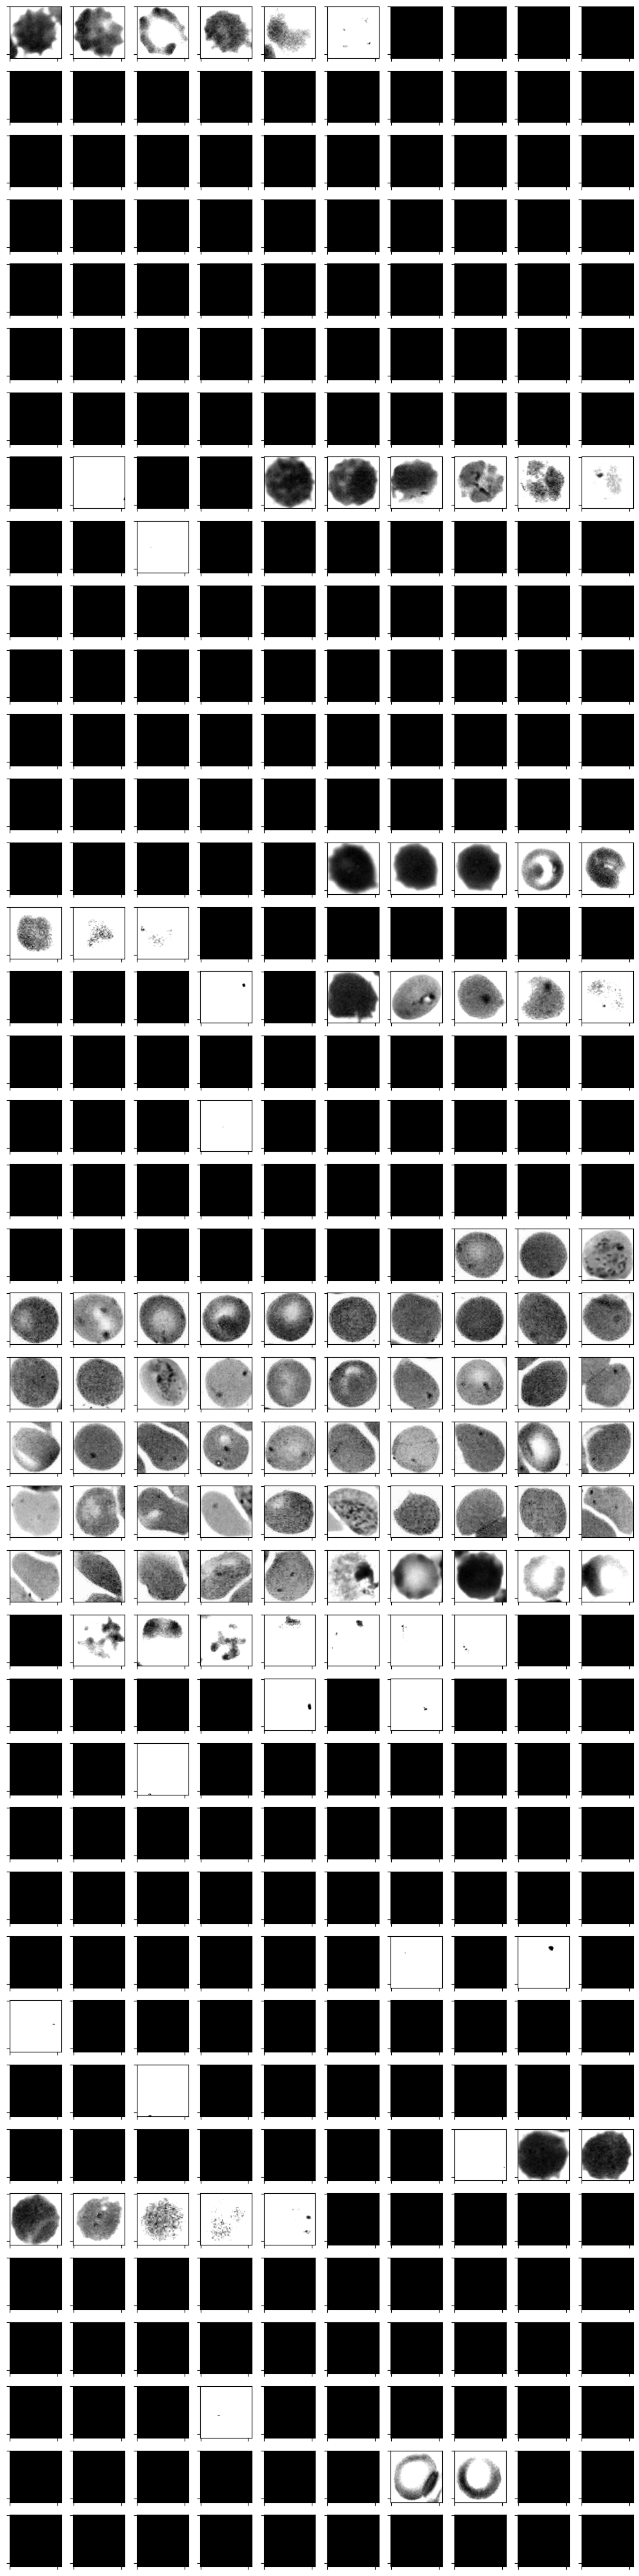

In [275]:
fig2, axs = plt.subplots(40,10, figsize = (10,40))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(list_img[i]["cropped resize"], cmap="gray")
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
fig2.tight_layout()
plt.show();

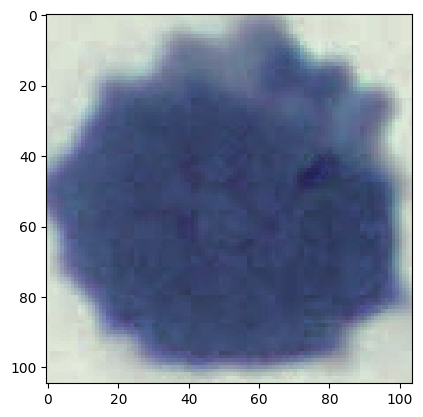

In [133]:
plt.imshow(list_img[100])